In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
edge_list = pd.read_csv('../data/dblp_article_duplicate_edge_list.csv')
edge_list

,source,target,title,year
0,Alejandro P. Buchmann,Frank Manola,Object Data Model Facilities for Multimedia Da...,1990
1,Alejandro P. Buchmann,Mark F. Hornick,Object Data Model Facilities for Multimedia Da...,1990
2,Frank Manola,Mark F. Hornick,Object Data Model Facilities for Multimedia Da...,1990
3,Farshad Nayeri,Joe D. Morrison,"Integrating Heterogeneous, Autonomous, Distrib...",1991
4,Farshad Nayeri,Mark F. Hornick,"Integrating Heterogeneous, Autonomous, Distrib...",1991
...,...,...,...,...
10065918,Markus Casper,Oliver Gutjahr,Analysis of projected hydrological behavior of...,2012
10065919,Markus Casper,Rita Ley,Analysis of projected hydrological behavior of...,2012
10065920,Oliver Gronz,Oliver Gutjahr,Analysis of projected hydrological behavior of...,2012
10065921,Oliver Gronz,Rita Ley,Analysis of projected hydrological behavior of...,2012


In [3]:
g = nx.from_pandas_edgelist(edge_list)
print(f'There are {nx.number_of_nodes(g)} nodes and {nx.number_of_edges(g)} edges.')

There are 1459843 nodes and 6722705 edges.


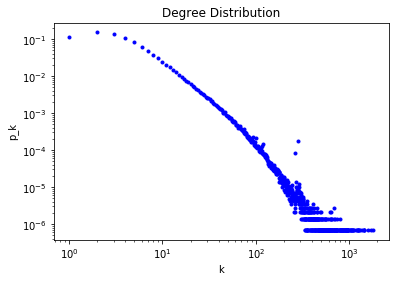

In [4]:
degree_sequence = [d for _, d in g.degree()]
unique, counts = np.unique(degree_sequence, return_counts=True)
counts_map = np.asarray((unique, counts)).T
pdf_empirical = counts_map[:, 1] / np.sum(counts_map[:, 1])

x_line = np.arange(min(degree_sequence), max(degree_sequence))

_, ax = plt.subplots()
ax.loglog(unique, pdf_empirical, 'b.')
# ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title('Degree Distribution')
plt.xlabel('k')
plt.ylabel('p_k')
plt.show()

In [5]:
# nx.number_of_edges(g)
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g0 = g.subgraph(gcc[0])
nx.average_shortest_path_length(g0)


KeyboardInterrupt: 